# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [82]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

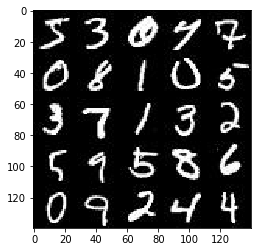

In [83]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

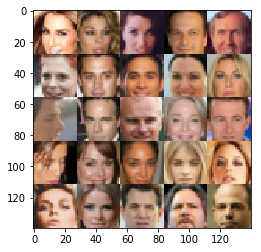

In [84]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [85]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/a572201/apps/deeplearning/miniconda3/envs/dlnd/lib/python3.6/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [86]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    z_input = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)

    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [87]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    
    with tf.variable_scope("discriminator", reuse=reuse):
    
        l1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        l1 = tf.maximum(0.2 * l1, l1)
        
        l2 = tf.layers.conv2d(l1, 128, 5, strides=2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=True)
        l2 = tf.maximum(0.2 *l2, l2)
        
        l3 = tf.layers.conv2d(l2, 256, 5, strides=2, padding='same')
        l3 = tf.layers.batch_normalization(l3, training=True)
        l3 = tf.maximum(0.2 *l3, l3) 
        
        l4 = tf.layers.conv2d(l3, 512, 5, strides=2, padding='same')
        l4 = tf.layers.batch_normalization(l4, training=True)
        l4 = tf.maximum(0.2 *l4, l4) 
        
        l5 = tf.reshape(l4, (-1, 4*4*512))
        logits = tf.layers.dense(l5, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [88]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    if is_train==True:
        reuse = False
    else:
        reuse = True
    
    with tf.variable_scope('generator', reuse=reuse):
        
        l1 = tf.layers.dense(z, 2*2*512)
        l1 = tf.reshape(l1, (-1, 2,2, 512))
        l1 = tf.layers.batch_normalization(l1, training=is_train)
        l1 = tf.maximum(0.2 *l1, l1)
        
        l2 = tf.layers.conv2d_transpose(l1, 256, 3,2, padding='same')
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = tf.maximum(0.2*l2, l2)
        
        l3 = tf.layers.conv2d_transpose(l2, 128, 4,1, padding='valid')
        l3 = tf.layers.batch_normalization(l3, training=is_train)
        l3 = tf.maximum(0.2*l3, l3)
        
        l4 = tf.layers.conv2d_transpose(l3, 64, 3,2, padding='same')
        l4 = tf.layers.batch_normalization(l4, training=is_train)
        l4 = tf.maximum(0.2*l4, l4)
        
        logits = tf.layers.conv2d_transpose(l4, out_channel_dim, 5, 2, padding='same')
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [89]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    gen_model = generator(input_z, out_channel_dim)
    disc_model, disc_logits = discriminator(input_real, reuse=False)
    disc_model_gen, disc_logits_gen = discriminator(gen_model, reuse=True)
    
    disc_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=disc_logits, labels=tf.ones_like(disc_model)))
    disc_loss_gen = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=disc_logits_gen, labels=tf.zeros_like(disc_model_gen)))
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
            logits=disc_logits_gen, labels=tf.ones_like(disc_model_gen)))
                              
    disc_total_loss = disc_loss +disc_loss_gen
    return disc_total_loss, gen_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [99]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    trainables = tf.trainable_variables()
    generator = [t for t in trainables if t.name.startswith('generator')]
    discriminator = [t for t in trainables if t.name.startswith('discriminator')]
    
    discriminator_optimizer = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=discriminator)
    
    updates = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    generator_updates = [u for u in updates if u.name.startswith('generator')]
    with tf.control_dependencies(generator_updates):
        generator_optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=beta1).minimize(g_loss, var_list=generator)
    
    return discriminator_optimizer, generator_optimizer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [100]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [110]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    image_width, image_height, image_channel = data_shape[1:]
    
    real_input, z_input, lr =  model_inputs(image_width, image_height, image_channel, z_dim)
    disc_loss, gen_loss = model_loss(real_input, z_input, image_channel)
    disc_optimizer, gen_optimizer = model_opt(disc_loss, gen_loss, learning_rate, beta1)
    
    i = 0
            
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                i+=1
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                batch_images *= 2.0
                sess.run(disc_optimizer, feed_dict={real_input: batch_images, z_input:z_sample, lr:learning_rate})
                sess.run(gen_optimizer, feed_dict={z_input:z_sample, lr:learning_rate})
                
                if i%25 == 0:
                    disc_training_loss = disc_loss.eval({z_input:z_sample, real_input:batch_images})
                    gen_training_loss = gen_loss.eval({z_input:z_sample})
                    print("Epoch:", epoch_i+1, "/" ,epoch_count,"; Disc Loss:", disc_training_loss,
                         "; Gen Loss:", gen_training_loss)
                if i%100 == 0:
                    show_generator_output(sess, 10, z_input, image_channel, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch: 1 / 2 ; Disc Loss: 0.186237 ; Gen Loss: 3.36317
Epoch: 1 / 2 ; Disc Loss: 1.31812 ; Gen Loss: 0.325724
Epoch: 1 / 2 ; Disc Loss: 1.3197 ; Gen Loss: 3.07486
Epoch: 1 / 2 ; Disc Loss: 0.435714 ; Gen Loss: 1.14699


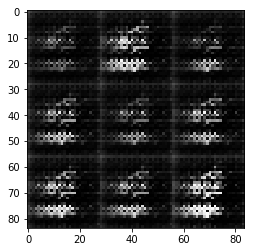

Epoch: 1 / 2 ; Disc Loss: 2.48494 ; Gen Loss: 0.108064
Epoch: 1 / 2 ; Disc Loss: 0.0376303 ; Gen Loss: 4.21037
Epoch: 1 / 2 ; Disc Loss: 0.326603 ; Gen Loss: 2.41472
Epoch: 1 / 2 ; Disc Loss: 0.251109 ; Gen Loss: 1.57582


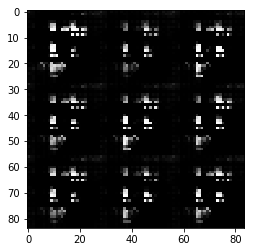

Epoch: 1 / 2 ; Disc Loss: 0.305236 ; Gen Loss: 1.62835
Epoch: 1 / 2 ; Disc Loss: 0.413538 ; Gen Loss: 2.3612
Epoch: 1 / 2 ; Disc Loss: 6.84985 ; Gen Loss: 0.00164717
Epoch: 1 / 2 ; Disc Loss: 5.67252 ; Gen Loss: 12.1994


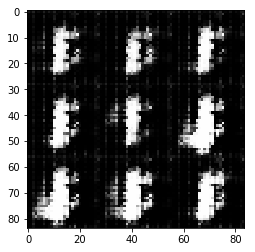

Epoch: 1 / 2 ; Disc Loss: 1.93731 ; Gen Loss: 0.320801
Epoch: 1 / 2 ; Disc Loss: 0.433913 ; Gen Loss: 11.8913
Epoch: 1 / 2 ; Disc Loss: 0.553017 ; Gen Loss: 1.19872
Epoch: 1 / 2 ; Disc Loss: 3.65428 ; Gen Loss: 0.0529425


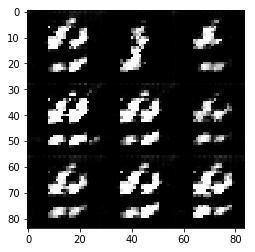

Epoch: 1 / 2 ; Disc Loss: 2.82248 ; Gen Loss: 10.5531
Epoch: 1 / 2 ; Disc Loss: 0.259621 ; Gen Loss: 2.71633
Epoch: 1 / 2 ; Disc Loss: 0.0979729 ; Gen Loss: 2.67878
Epoch: 1 / 2 ; Disc Loss: 0.0180108 ; Gen Loss: 7.28902


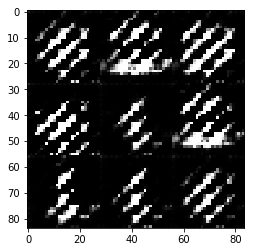

Epoch: 1 / 2 ; Disc Loss: 0.0362837 ; Gen Loss: 4.029
Epoch: 1 / 2 ; Disc Loss: 2.1265 ; Gen Loss: 0.506765
Epoch: 1 / 2 ; Disc Loss: 0.0982726 ; Gen Loss: 3.5311
Epoch: 1 / 2 ; Disc Loss: 0.196528 ; Gen Loss: 2.20786


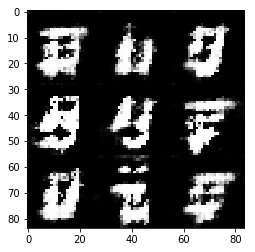

Epoch: 1 / 2 ; Disc Loss: 3.10399 ; Gen Loss: 9.66565
Epoch: 1 / 2 ; Disc Loss: 0.333847 ; Gen Loss: 3.52307
Epoch: 1 / 2 ; Disc Loss: 0.222608 ; Gen Loss: 2.22107
Epoch: 1 / 2 ; Disc Loss: 0.115894 ; Gen Loss: 4.75415


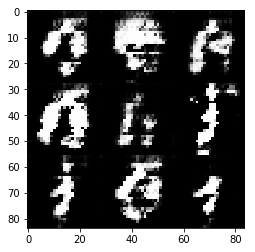

Epoch: 1 / 2 ; Disc Loss: 0.166377 ; Gen Loss: 5.55342
Epoch: 1 / 2 ; Disc Loss: 0.397111 ; Gen Loss: 3.56885
Epoch: 1 / 2 ; Disc Loss: 1.07151 ; Gen Loss: 1.24492
Epoch: 1 / 2 ; Disc Loss: 2.83073 ; Gen Loss: 0.175867


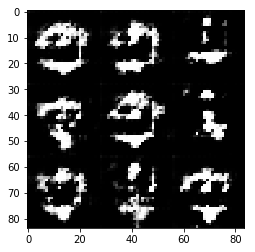

Epoch: 1 / 2 ; Disc Loss: 0.479965 ; Gen Loss: 1.19024
Epoch: 1 / 2 ; Disc Loss: 1.19479 ; Gen Loss: 2.8689
Epoch: 1 / 2 ; Disc Loss: 0.291995 ; Gen Loss: 2.62282
Epoch: 1 / 2 ; Disc Loss: 1.78203 ; Gen Loss: 0.408082


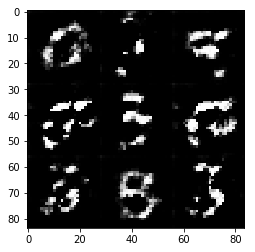

Epoch: 1 / 2 ; Disc Loss: 0.56552 ; Gen Loss: 1.30033
Epoch: 1 / 2 ; Disc Loss: 0.640041 ; Gen Loss: 2.76353
Epoch: 1 / 2 ; Disc Loss: 0.698496 ; Gen Loss: 1.15954
Epoch: 1 / 2 ; Disc Loss: 0.585026 ; Gen Loss: 1.46901


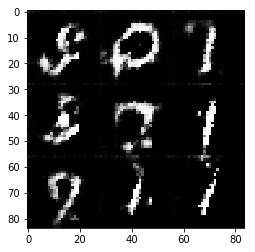

Epoch: 1 / 2 ; Disc Loss: 0.342501 ; Gen Loss: 3.62634
Epoch: 1 / 2 ; Disc Loss: 1.13046 ; Gen Loss: 2.48531
Epoch: 1 / 2 ; Disc Loss: 0.933841 ; Gen Loss: 2.49814
Epoch: 1 / 2 ; Disc Loss: 1.41841 ; Gen Loss: 0.531447


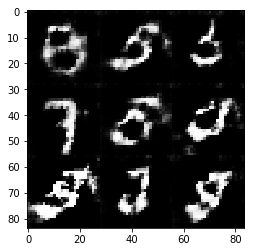

Epoch: 1 / 2 ; Disc Loss: 0.84538 ; Gen Loss: 0.825013
Epoch: 1 / 2 ; Disc Loss: 0.291881 ; Gen Loss: 2.27271
Epoch: 1 / 2 ; Disc Loss: 0.832807 ; Gen Loss: 0.727167
Epoch: 1 / 2 ; Disc Loss: 0.461657 ; Gen Loss: 1.25077


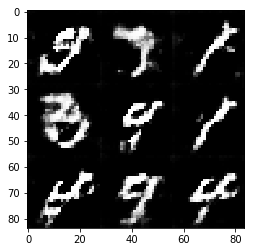

Epoch: 1 / 2 ; Disc Loss: 2.66061 ; Gen Loss: 0.125137
Epoch: 1 / 2 ; Disc Loss: 0.308434 ; Gen Loss: 7.15251
Epoch: 1 / 2 ; Disc Loss: 1.05858 ; Gen Loss: 0.644081
Epoch: 1 / 2 ; Disc Loss: 0.692696 ; Gen Loss: 1.22948


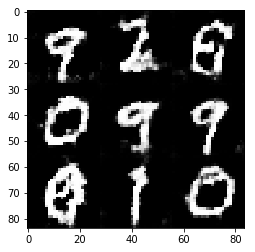

Epoch: 1 / 2 ; Disc Loss: 0.18223 ; Gen Loss: 2.51306
Epoch: 1 / 2 ; Disc Loss: 0.301302 ; Gen Loss: 2.70127
Epoch: 1 / 2 ; Disc Loss: 0.833465 ; Gen Loss: 0.748197
Epoch: 1 / 2 ; Disc Loss: 0.907772 ; Gen Loss: 0.674244


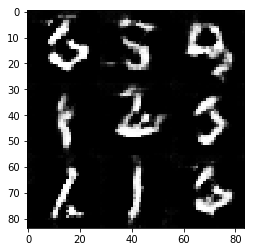

Epoch: 1 / 2 ; Disc Loss: 0.516088 ; Gen Loss: 1.96587
Epoch: 1 / 2 ; Disc Loss: 1.03689 ; Gen Loss: 0.52895
Epoch: 1 / 2 ; Disc Loss: 1.28618 ; Gen Loss: 6.15167
Epoch: 1 / 2 ; Disc Loss: 0.160959 ; Gen Loss: 3.3213


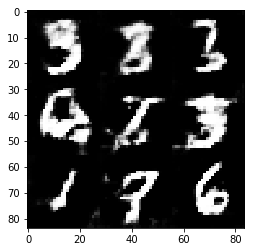

Epoch: 1 / 2 ; Disc Loss: 2.85846 ; Gen Loss: 0.0818386
Epoch: 1 / 2 ; Disc Loss: 0.80446 ; Gen Loss: 0.858974
Epoch: 1 / 2 ; Disc Loss: 0.23967 ; Gen Loss: 3.33674
Epoch: 1 / 2 ; Disc Loss: 1.40155 ; Gen Loss: 0.45767


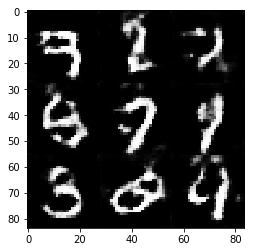

Epoch: 1 / 2 ; Disc Loss: 1.0521 ; Gen Loss: 3.16862
Epoch: 1 / 2 ; Disc Loss: 0.605805 ; Gen Loss: 0.927663
Epoch: 1 / 2 ; Disc Loss: 0.753707 ; Gen Loss: 1.45098
Epoch: 1 / 2 ; Disc Loss: 1.08271 ; Gen Loss: 0.544785


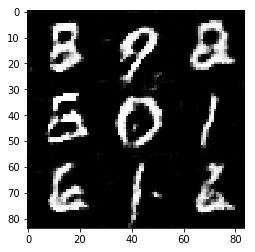

Epoch: 1 / 2 ; Disc Loss: 0.651806 ; Gen Loss: 0.867147
Epoch: 1 / 2 ; Disc Loss: 0.564747 ; Gen Loss: 1.46203
Epoch: 1 / 2 ; Disc Loss: 1.65048 ; Gen Loss: 0.264951
Epoch: 1 / 2 ; Disc Loss: 0.198114 ; Gen Loss: 2.77417


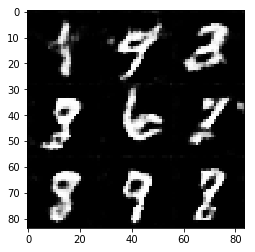

Epoch: 1 / 2 ; Disc Loss: 0.886531 ; Gen Loss: 0.741272
Epoch: 1 / 2 ; Disc Loss: 0.830406 ; Gen Loss: 0.723608
Epoch: 1 / 2 ; Disc Loss: 0.505298 ; Gen Loss: 1.2666
Epoch: 2 / 2 ; Disc Loss: 0.437305 ; Gen Loss: 1.41593


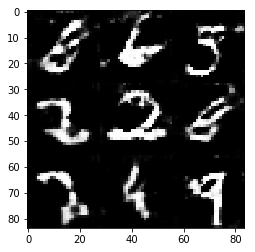

Epoch: 2 / 2 ; Disc Loss: 0.57342 ; Gen Loss: 1.06654
Epoch: 2 / 2 ; Disc Loss: 0.526719 ; Gen Loss: 1.85393
Epoch: 2 / 2 ; Disc Loss: 2.35256 ; Gen Loss: 0.275063
Epoch: 2 / 2 ; Disc Loss: 0.680331 ; Gen Loss: 1.38621


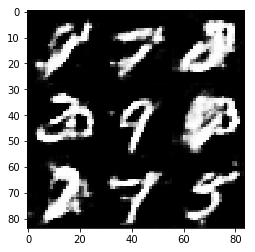

Epoch: 2 / 2 ; Disc Loss: 2.2457 ; Gen Loss: 0.144508
Epoch: 2 / 2 ; Disc Loss: 0.767808 ; Gen Loss: 1.14739
Epoch: 2 / 2 ; Disc Loss: 1.79169 ; Gen Loss: 0.216949
Epoch: 2 / 2 ; Disc Loss: 0.647567 ; Gen Loss: 0.950663


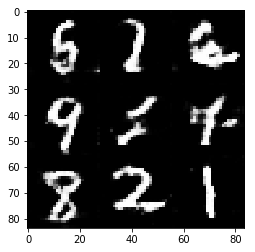

Epoch: 2 / 2 ; Disc Loss: 0.641856 ; Gen Loss: 3.45186
Epoch: 2 / 2 ; Disc Loss: 2.08936 ; Gen Loss: 0.352279
Epoch: 2 / 2 ; Disc Loss: 0.703684 ; Gen Loss: 1.26468
Epoch: 2 / 2 ; Disc Loss: 1.10702 ; Gen Loss: 0.678432


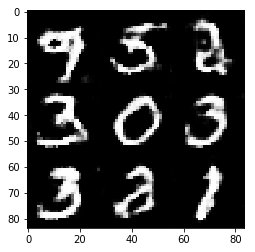

Epoch: 2 / 2 ; Disc Loss: 1.39931 ; Gen Loss: 0.328213
Epoch: 2 / 2 ; Disc Loss: 0.68118 ; Gen Loss: 0.895505
Epoch: 2 / 2 ; Disc Loss: 1.28772 ; Gen Loss: 0.392514
Epoch: 2 / 2 ; Disc Loss: 0.799911 ; Gen Loss: 1.30307


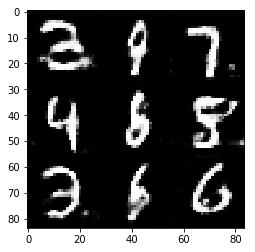

Epoch: 2 / 2 ; Disc Loss: 2.12057 ; Gen Loss: 0.270061
Epoch: 2 / 2 ; Disc Loss: 0.822374 ; Gen Loss: 1.03046
Epoch: 2 / 2 ; Disc Loss: 0.473756 ; Gen Loss: 1.28541
Epoch: 2 / 2 ; Disc Loss: 1.71077 ; Gen Loss: 0.272708


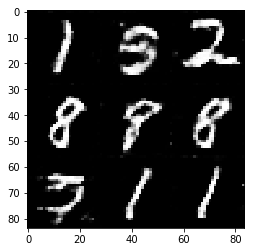

Epoch: 2 / 2 ; Disc Loss: 0.228679 ; Gen Loss: 2.33136
Epoch: 2 / 2 ; Disc Loss: 2.37552 ; Gen Loss: 0.13806
Epoch: 2 / 2 ; Disc Loss: 1.0145 ; Gen Loss: 0.7655
Epoch: 2 / 2 ; Disc Loss: 0.582145 ; Gen Loss: 1.3613


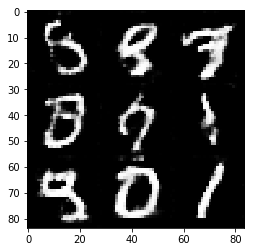

Epoch: 2 / 2 ; Disc Loss: 0.781242 ; Gen Loss: 0.862456
Epoch: 2 / 2 ; Disc Loss: 1.87283 ; Gen Loss: 0.228163
Epoch: 2 / 2 ; Disc Loss: 0.382066 ; Gen Loss: 3.20542
Epoch: 2 / 2 ; Disc Loss: 0.723916 ; Gen Loss: 0.99382


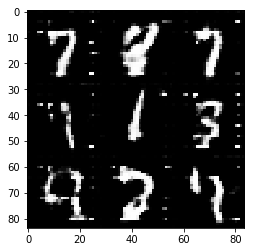

Epoch: 2 / 2 ; Disc Loss: 1.08773 ; Gen Loss: 0.497098
Epoch: 2 / 2 ; Disc Loss: 0.91864 ; Gen Loss: 0.680949
Epoch: 2 / 2 ; Disc Loss: 2.87684 ; Gen Loss: 0.0769686
Epoch: 2 / 2 ; Disc Loss: 3.61011 ; Gen Loss: 0.0455445


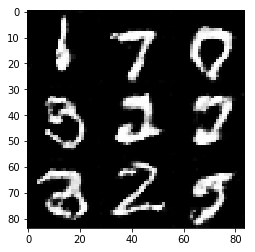

Epoch: 2 / 2 ; Disc Loss: 0.571306 ; Gen Loss: 1.07122
Epoch: 2 / 2 ; Disc Loss: 0.596321 ; Gen Loss: 1.05496
Epoch: 2 / 2 ; Disc Loss: 0.340634 ; Gen Loss: 1.79893
Epoch: 2 / 2 ; Disc Loss: 0.600298 ; Gen Loss: 2.119


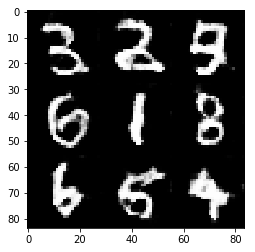

Epoch: 2 / 2 ; Disc Loss: 1.14382 ; Gen Loss: 0.760473
Epoch: 2 / 2 ; Disc Loss: 0.813224 ; Gen Loss: 0.816637
Epoch: 2 / 2 ; Disc Loss: 2.22006 ; Gen Loss: 0.216972
Epoch: 2 / 2 ; Disc Loss: 0.407695 ; Gen Loss: 2.17327


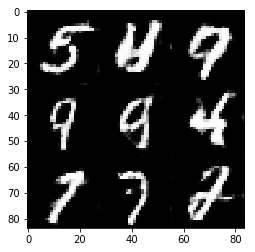

Epoch: 2 / 2 ; Disc Loss: 0.544636 ; Gen Loss: 1.44384
Epoch: 2 / 2 ; Disc Loss: 0.415409 ; Gen Loss: 1.68064
Epoch: 2 / 2 ; Disc Loss: 0.799542 ; Gen Loss: 1.07968
Epoch: 2 / 2 ; Disc Loss: 0.315595 ; Gen Loss: 1.45528


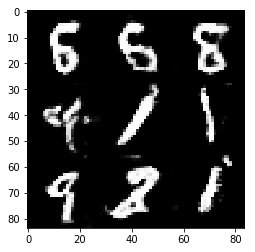

Epoch: 2 / 2 ; Disc Loss: 2.52295 ; Gen Loss: 0.755256
Epoch: 2 / 2 ; Disc Loss: 0.70906 ; Gen Loss: 0.745531
Epoch: 2 / 2 ; Disc Loss: 1.1948 ; Gen Loss: 0.592561
Epoch: 2 / 2 ; Disc Loss: 1.44964 ; Gen Loss: 0.685042


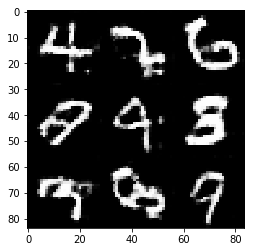

Epoch: 2 / 2 ; Disc Loss: 0.29361 ; Gen Loss: 4.36074
Epoch: 2 / 2 ; Disc Loss: 1.0406 ; Gen Loss: 1.03922
Epoch: 2 / 2 ; Disc Loss: 1.34332 ; Gen Loss: 0.420448
Epoch: 2 / 2 ; Disc Loss: 0.283595 ; Gen Loss: 1.79504


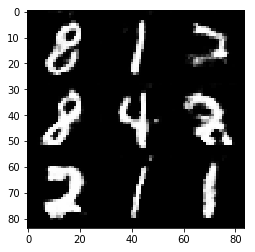

Epoch: 2 / 2 ; Disc Loss: 0.647323 ; Gen Loss: 2.05214
Epoch: 2 / 2 ; Disc Loss: 2.99404 ; Gen Loss: 0.090862
Epoch: 2 / 2 ; Disc Loss: 1.75288 ; Gen Loss: 0.306481
Epoch: 2 / 2 ; Disc Loss: 2.64581 ; Gen Loss: 0.0979424


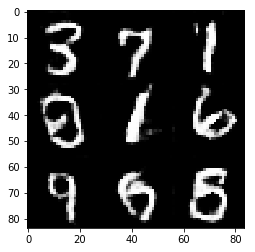

Epoch: 2 / 2 ; Disc Loss: 0.348253 ; Gen Loss: 4.12234
Epoch: 2 / 2 ; Disc Loss: 2.19266 ; Gen Loss: 0.18048
Epoch: 2 / 2 ; Disc Loss: 0.498721 ; Gen Loss: 1.07081
Epoch: 2 / 2 ; Disc Loss: 2.50958 ; Gen Loss: 0.155058


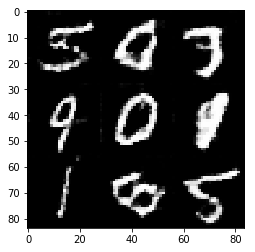

Epoch: 2 / 2 ; Disc Loss: 2.23047 ; Gen Loss: 0.172832
Epoch: 2 / 2 ; Disc Loss: 2.05577 ; Gen Loss: 0.249024
Epoch: 2 / 2 ; Disc Loss: 1.16742 ; Gen Loss: 3.34106
Epoch: 2 / 2 ; Disc Loss: 0.53031 ; Gen Loss: 1.6813


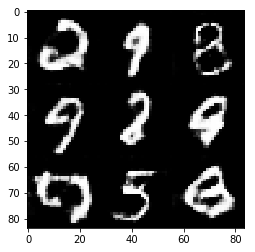

Epoch: 2 / 2 ; Disc Loss: 0.749837 ; Gen Loss: 1.25843
Epoch: 2 / 2 ; Disc Loss: 2.781 ; Gen Loss: 0.133511
Epoch: 2 / 2 ; Disc Loss: 1.28002 ; Gen Loss: 0.422081
Epoch: 2 / 2 ; Disc Loss: 0.189588 ; Gen Loss: 2.73579


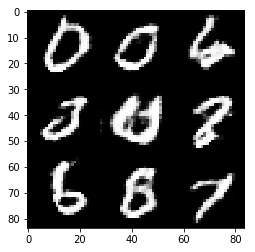

Epoch: 2 / 2 ; Disc Loss: 0.729171 ; Gen Loss: 0.804595
Epoch: 2 / 2 ; Disc Loss: 0.348598 ; Gen Loss: 1.426
Epoch: 2 / 2 ; Disc Loss: 0.82042 ; Gen Loss: 0.86858
Epoch: 2 / 2 ; Disc Loss: 0.722455 ; Gen Loss: 1.98745


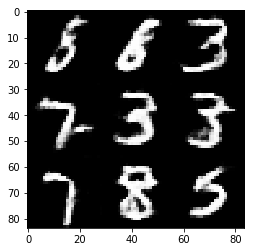

Epoch: 2 / 2 ; Disc Loss: 0.676082 ; Gen Loss: 1.43871
Epoch: 2 / 2 ; Disc Loss: 0.6912 ; Gen Loss: 0.864872


In [111]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch: 1 / 1 ; Disc Loss: 9.0818 ; Gen Loss: 0.000191702
Epoch: 1 / 1 ; Disc Loss: 1.5032 ; Gen Loss: 0.762289
Epoch: 1 / 1 ; Disc Loss: 1.21029 ; Gen Loss: 3.31996
Epoch: 1 / 1 ; Disc Loss: 0.373563 ; Gen Loss: 2.33843


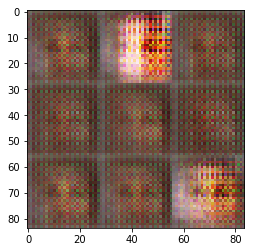

Epoch: 1 / 1 ; Disc Loss: 0.169704 ; Gen Loss: 3.23267
Epoch: 1 / 1 ; Disc Loss: 0.273332 ; Gen Loss: 2.37227
Epoch: 1 / 1 ; Disc Loss: 3.0329 ; Gen Loss: 0.0992806
Epoch: 1 / 1 ; Disc Loss: 1.05985 ; Gen Loss: 1.29248


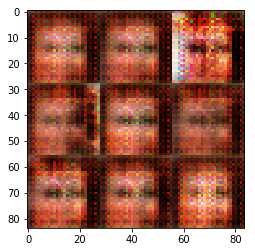

Epoch: 1 / 1 ; Disc Loss: 1.89943 ; Gen Loss: 6.14647
Epoch: 1 / 1 ; Disc Loss: 0.398007 ; Gen Loss: 1.52438
Epoch: 1 / 1 ; Disc Loss: 2.3479 ; Gen Loss: 5.58818
Epoch: 1 / 1 ; Disc Loss: 1.76291 ; Gen Loss: 0.33792


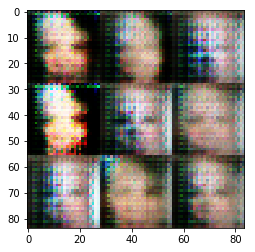

Epoch: 1 / 1 ; Disc Loss: 2.90354 ; Gen Loss: 0.0783474
Epoch: 1 / 1 ; Disc Loss: 0.687602 ; Gen Loss: 1.10202
Epoch: 1 / 1 ; Disc Loss: 2.30491 ; Gen Loss: 0.155995
Epoch: 1 / 1 ; Disc Loss: 0.998801 ; Gen Loss: 1.38291


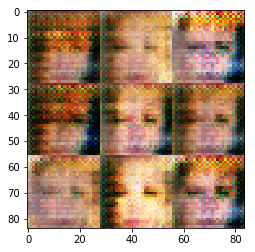

Epoch: 1 / 1 ; Disc Loss: 1.28275 ; Gen Loss: 1.30803
Epoch: 1 / 1 ; Disc Loss: 0.598884 ; Gen Loss: 1.13758
Epoch: 1 / 1 ; Disc Loss: 0.984609 ; Gen Loss: 1.0379
Epoch: 1 / 1 ; Disc Loss: 1.67907 ; Gen Loss: 0.418091


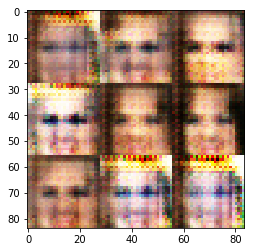

Epoch: 1 / 1 ; Disc Loss: 0.874837 ; Gen Loss: 0.764593
Epoch: 1 / 1 ; Disc Loss: 1.61965 ; Gen Loss: 0.338536
Epoch: 1 / 1 ; Disc Loss: 1.04775 ; Gen Loss: 0.719482
Epoch: 1 / 1 ; Disc Loss: 1.45236 ; Gen Loss: 0.352266


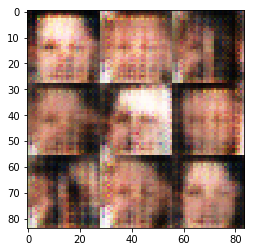

Epoch: 1 / 1 ; Disc Loss: 0.875268 ; Gen Loss: 1.43067
Epoch: 1 / 1 ; Disc Loss: 0.744155 ; Gen Loss: 1.3344
Epoch: 1 / 1 ; Disc Loss: 0.557802 ; Gen Loss: 1.43887
Epoch: 1 / 1 ; Disc Loss: 0.47326 ; Gen Loss: 1.52704


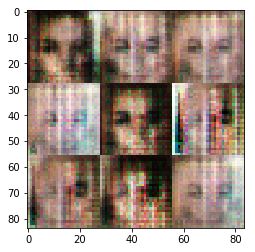

Epoch: 1 / 1 ; Disc Loss: 0.442961 ; Gen Loss: 1.35346
Epoch: 1 / 1 ; Disc Loss: 0.657059 ; Gen Loss: 2.41471
Epoch: 1 / 1 ; Disc Loss: 0.742934 ; Gen Loss: 1.01125
Epoch: 1 / 1 ; Disc Loss: 1.70243 ; Gen Loss: 4.19618


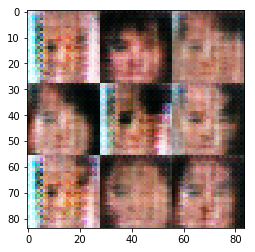

Epoch: 1 / 1 ; Disc Loss: 0.526927 ; Gen Loss: 1.689
Epoch: 1 / 1 ; Disc Loss: 2.06875 ; Gen Loss: 0.166187
Epoch: 1 / 1 ; Disc Loss: 0.243149 ; Gen Loss: 2.81086
Epoch: 1 / 1 ; Disc Loss: 0.540453 ; Gen Loss: 1.21719


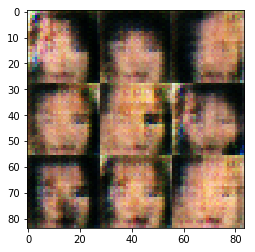

Epoch: 1 / 1 ; Disc Loss: 0.634194 ; Gen Loss: 1.10683
Epoch: 1 / 1 ; Disc Loss: 1.00777 ; Gen Loss: 0.604503
Epoch: 1 / 1 ; Disc Loss: 0.531415 ; Gen Loss: 1.95805
Epoch: 1 / 1 ; Disc Loss: 0.947026 ; Gen Loss: 0.973931


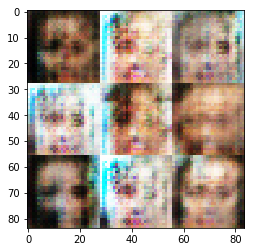

Epoch: 1 / 1 ; Disc Loss: 1.12957 ; Gen Loss: 0.514767
Epoch: 1 / 1 ; Disc Loss: 0.696092 ; Gen Loss: 0.876739
Epoch: 1 / 1 ; Disc Loss: 1.0046 ; Gen Loss: 3.78546
Epoch: 1 / 1 ; Disc Loss: 2.54749 ; Gen Loss: 0.140508


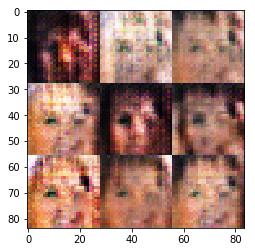

Epoch: 1 / 1 ; Disc Loss: 2.75137 ; Gen Loss: 6.95466
Epoch: 1 / 1 ; Disc Loss: 0.739441 ; Gen Loss: 0.969723
Epoch: 1 / 1 ; Disc Loss: 0.282033 ; Gen Loss: 2.45678
Epoch: 1 / 1 ; Disc Loss: 0.430395 ; Gen Loss: 1.89214


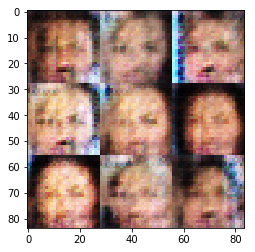

Epoch: 1 / 1 ; Disc Loss: 0.198896 ; Gen Loss: 2.64361
Epoch: 1 / 1 ; Disc Loss: 0.424228 ; Gen Loss: 1.72798
Epoch: 1 / 1 ; Disc Loss: 1.16778 ; Gen Loss: 0.530075
Epoch: 1 / 1 ; Disc Loss: 0.479503 ; Gen Loss: 2.38407


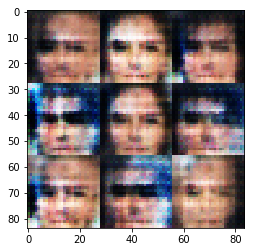

Epoch: 1 / 1 ; Disc Loss: 2.15521 ; Gen Loss: 0.140753
Epoch: 1 / 1 ; Disc Loss: 0.998244 ; Gen Loss: 1.37326
Epoch: 1 / 1 ; Disc Loss: 0.382941 ; Gen Loss: 3.49807
Epoch: 1 / 1 ; Disc Loss: 3.06327 ; Gen Loss: 0.050003


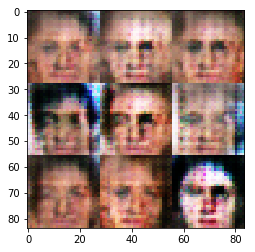

Epoch: 1 / 1 ; Disc Loss: 1.64069 ; Gen Loss: 0.305038
Epoch: 1 / 1 ; Disc Loss: 0.394025 ; Gen Loss: 1.58916
Epoch: 1 / 1 ; Disc Loss: 1.03362 ; Gen Loss: 0.844138
Epoch: 1 / 1 ; Disc Loss: 1.30492 ; Gen Loss: 5.6339


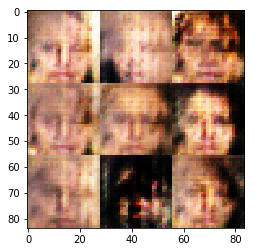

Epoch: 1 / 1 ; Disc Loss: 0.329911 ; Gen Loss: 1.74294
Epoch: 1 / 1 ; Disc Loss: 1.28413 ; Gen Loss: 0.584037
Epoch: 1 / 1 ; Disc Loss: 0.686645 ; Gen Loss: 1.29869
Epoch: 1 / 1 ; Disc Loss: 0.285551 ; Gen Loss: 4.77942


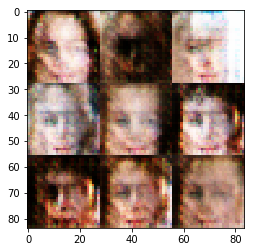

Epoch: 1 / 1 ; Disc Loss: 0.320171 ; Gen Loss: 2.22475
Epoch: 1 / 1 ; Disc Loss: 0.15837 ; Gen Loss: 2.51229
Epoch: 1 / 1 ; Disc Loss: 0.373554 ; Gen Loss: 2.38325
Epoch: 1 / 1 ; Disc Loss: 0.564327 ; Gen Loss: 1.02858


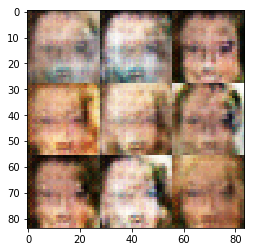

Epoch: 1 / 1 ; Disc Loss: 1.10821 ; Gen Loss: 0.578851
Epoch: 1 / 1 ; Disc Loss: 0.952516 ; Gen Loss: 0.622964
Epoch: 1 / 1 ; Disc Loss: 0.768993 ; Gen Loss: 1.45874
Epoch: 1 / 1 ; Disc Loss: 0.65948 ; Gen Loss: 3.62144


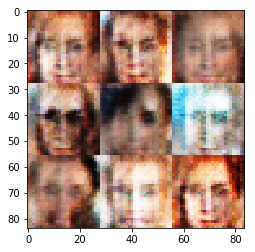

Epoch: 1 / 1 ; Disc Loss: 1.23544 ; Gen Loss: 0.53924
Epoch: 1 / 1 ; Disc Loss: 0.181042 ; Gen Loss: 3.18747
Epoch: 1 / 1 ; Disc Loss: 0.707894 ; Gen Loss: 1.08641
Epoch: 1 / 1 ; Disc Loss: 0.628873 ; Gen Loss: 1.1302


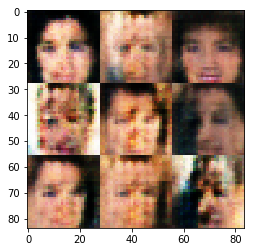

Epoch: 1 / 1 ; Disc Loss: 0.381889 ; Gen Loss: 2.95155
Epoch: 1 / 1 ; Disc Loss: 1.05752 ; Gen Loss: 4.77146
Epoch: 1 / 1 ; Disc Loss: 1.4559 ; Gen Loss: 0.400122
Epoch: 1 / 1 ; Disc Loss: 0.619116 ; Gen Loss: 0.870774


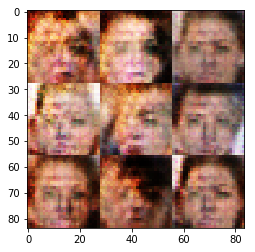

Epoch: 1 / 1 ; Disc Loss: 0.310127 ; Gen Loss: 1.68117
Epoch: 1 / 1 ; Disc Loss: 0.914005 ; Gen Loss: 0.698088
Epoch: 1 / 1 ; Disc Loss: 1.68163 ; Gen Loss: 0.299391
Epoch: 1 / 1 ; Disc Loss: 0.182042 ; Gen Loss: 2.20027


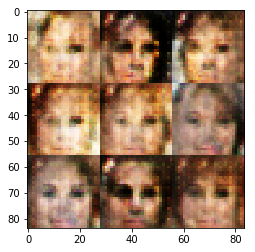

Epoch: 1 / 1 ; Disc Loss: 0.484435 ; Gen Loss: 1.66324
Epoch: 1 / 1 ; Disc Loss: 0.307031 ; Gen Loss: 3.63397
Epoch: 1 / 1 ; Disc Loss: 1.47016 ; Gen Loss: 0.635512
Epoch: 1 / 1 ; Disc Loss: 0.863175 ; Gen Loss: 1.46503


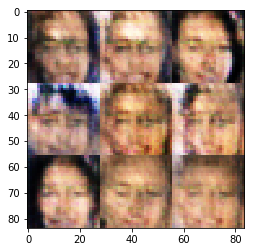

Epoch: 1 / 1 ; Disc Loss: 1.57397 ; Gen Loss: 0.349049
Epoch: 1 / 1 ; Disc Loss: 0.927758 ; Gen Loss: 0.632085
Epoch: 1 / 1 ; Disc Loss: 0.341458 ; Gen Loss: 1.55678
Epoch: 1 / 1 ; Disc Loss: 0.260065 ; Gen Loss: 2.29449


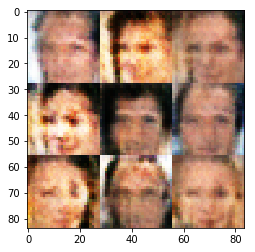

Epoch: 1 / 1 ; Disc Loss: 0.0300512 ; Gen Loss: 4.19138
Epoch: 1 / 1 ; Disc Loss: 1.1693 ; Gen Loss: 0.650865
Epoch: 1 / 1 ; Disc Loss: 0.521557 ; Gen Loss: 1.48671
Epoch: 1 / 1 ; Disc Loss: 0.589864 ; Gen Loss: 3.29393


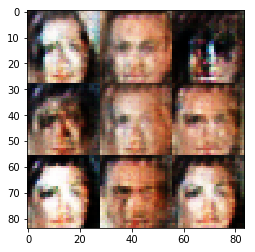

Epoch: 1 / 1 ; Disc Loss: 0.375445 ; Gen Loss: 1.58932
Epoch: 1 / 1 ; Disc Loss: 0.699187 ; Gen Loss: 0.836937
Epoch: 1 / 1 ; Disc Loss: 1.17953 ; Gen Loss: 0.686821
Epoch: 1 / 1 ; Disc Loss: 0.0983827 ; Gen Loss: 3.31123


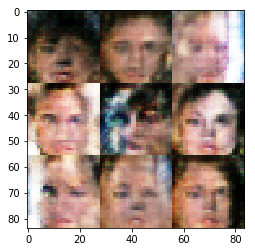

Epoch: 1 / 1 ; Disc Loss: 0.850362 ; Gen Loss: 3.51045
Epoch: 1 / 1 ; Disc Loss: 1.60003 ; Gen Loss: 0.244469
Epoch: 1 / 1 ; Disc Loss: 0.711449 ; Gen Loss: 0.768931
Epoch: 1 / 1 ; Disc Loss: 0.38044 ; Gen Loss: 1.84938


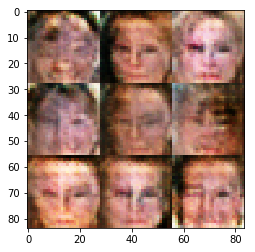

Epoch: 1 / 1 ; Disc Loss: 0.830805 ; Gen Loss: 0.805725
Epoch: 1 / 1 ; Disc Loss: 0.436969 ; Gen Loss: 1.23254
Epoch: 1 / 1 ; Disc Loss: 0.415149 ; Gen Loss: 3.70204
Epoch: 1 / 1 ; Disc Loss: 1.9369 ; Gen Loss: 5.78438


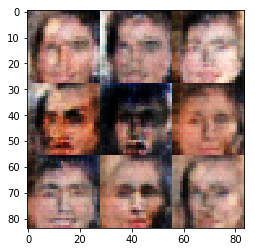

Epoch: 1 / 1 ; Disc Loss: 2.04812 ; Gen Loss: 6.88076
Epoch: 1 / 1 ; Disc Loss: 0.680812 ; Gen Loss: 0.919514
Epoch: 1 / 1 ; Disc Loss: 1.50678 ; Gen Loss: 0.293869
Epoch: 1 / 1 ; Disc Loss: 0.339419 ; Gen Loss: 1.63862


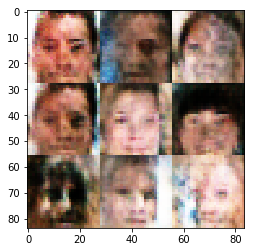

Epoch: 1 / 1 ; Disc Loss: 0.358494 ; Gen Loss: 1.55395
Epoch: 1 / 1 ; Disc Loss: 0.255594 ; Gen Loss: 2.1394
Epoch: 1 / 1 ; Disc Loss: 1.62058 ; Gen Loss: 0.234839
Epoch: 1 / 1 ; Disc Loss: 0.524581 ; Gen Loss: 1.55588


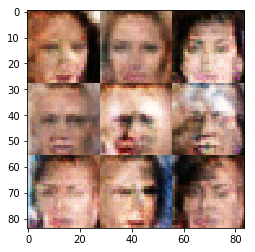

Epoch: 1 / 1 ; Disc Loss: 0.919783 ; Gen Loss: 4.80021
Epoch: 1 / 1 ; Disc Loss: 0.490046 ; Gen Loss: 1.5184
Epoch: 1 / 1 ; Disc Loss: 0.334347 ; Gen Loss: 2.05623
Epoch: 1 / 1 ; Disc Loss: 0.0859607 ; Gen Loss: 3.46946


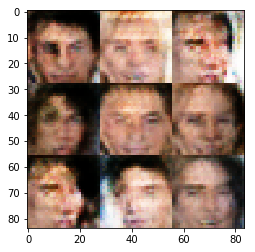

Epoch: 1 / 1 ; Disc Loss: 0.446363 ; Gen Loss: 3.77915
Epoch: 1 / 1 ; Disc Loss: 0.410401 ; Gen Loss: 1.51494
Epoch: 1 / 1 ; Disc Loss: 1.29395 ; Gen Loss: 0.479892
Epoch: 1 / 1 ; Disc Loss: 1.02093 ; Gen Loss: 0.539151


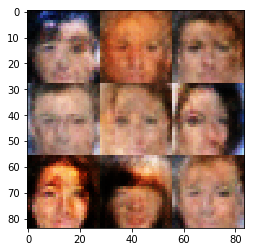

Epoch: 1 / 1 ; Disc Loss: 0.87058 ; Gen Loss: 5.49828
Epoch: 1 / 1 ; Disc Loss: 0.669784 ; Gen Loss: 5.06724
Epoch: 1 / 1 ; Disc Loss: 0.513552 ; Gen Loss: 2.57995
Epoch: 1 / 1 ; Disc Loss: 0.587773 ; Gen Loss: 0.98613


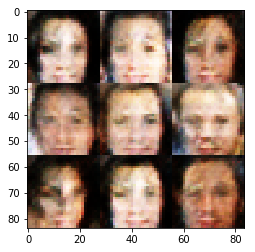

Epoch: 1 / 1 ; Disc Loss: 1.79979 ; Gen Loss: 0.271462
Epoch: 1 / 1 ; Disc Loss: 0.51633 ; Gen Loss: 1.69943
Epoch: 1 / 1 ; Disc Loss: 0.475599 ; Gen Loss: 2.014
Epoch: 1 / 1 ; Disc Loss: 1.25244 ; Gen Loss: 0.450209


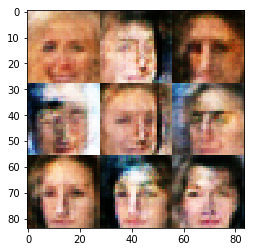

Epoch: 1 / 1 ; Disc Loss: 0.467727 ; Gen Loss: 1.46623
Epoch: 1 / 1 ; Disc Loss: 1.46712 ; Gen Loss: 0.354023
Epoch: 1 / 1 ; Disc Loss: 3.20071 ; Gen Loss: 6.5959
Epoch: 1 / 1 ; Disc Loss: 0.4088 ; Gen Loss: 2.92082


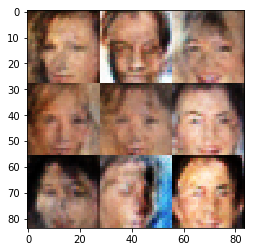

Epoch: 1 / 1 ; Disc Loss: 0.529004 ; Gen Loss: 1.55998
Epoch: 1 / 1 ; Disc Loss: 0.834667 ; Gen Loss: 3.66304
Epoch: 1 / 1 ; Disc Loss: 0.30357 ; Gen Loss: 2.47036
Epoch: 1 / 1 ; Disc Loss: 0.353119 ; Gen Loss: 2.76667


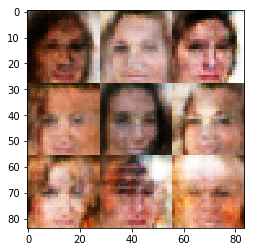

Epoch: 1 / 1 ; Disc Loss: 0.439749 ; Gen Loss: 3.03398
Epoch: 1 / 1 ; Disc Loss: 0.945973 ; Gen Loss: 0.539475
Epoch: 1 / 1 ; Disc Loss: 0.46028 ; Gen Loss: 1.63899
Epoch: 1 / 1 ; Disc Loss: 0.903727 ; Gen Loss: 5.01097


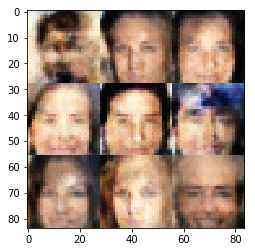

Epoch: 1 / 1 ; Disc Loss: 0.660449 ; Gen Loss: 1.67126
Epoch: 1 / 1 ; Disc Loss: 0.533836 ; Gen Loss: 1.09147
Epoch: 1 / 1 ; Disc Loss: 0.449868 ; Gen Loss: 1.19133
Epoch: 1 / 1 ; Disc Loss: 0.176269 ; Gen Loss: 2.55958


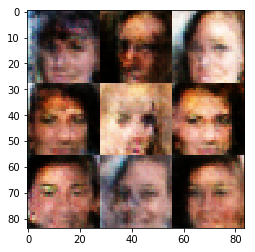

Epoch: 1 / 1 ; Disc Loss: 1.0398 ; Gen Loss: 0.509081
Epoch: 1 / 1 ; Disc Loss: 0.430738 ; Gen Loss: 1.52505
Epoch: 1 / 1 ; Disc Loss: 0.347834 ; Gen Loss: 1.56624
Epoch: 1 / 1 ; Disc Loss: 0.838822 ; Gen Loss: 0.651132


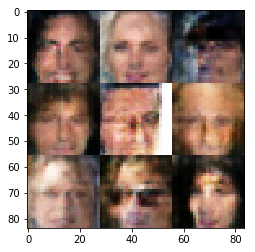

Epoch: 1 / 1 ; Disc Loss: 1.8978 ; Gen Loss: 0.182284
Epoch: 1 / 1 ; Disc Loss: 0.234091 ; Gen Loss: 2.1988
Epoch: 1 / 1 ; Disc Loss: 1.12588 ; Gen Loss: 0.451556
Epoch: 1 / 1 ; Disc Loss: 0.808307 ; Gen Loss: 0.78847


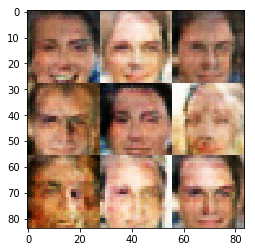

Epoch: 1 / 1 ; Disc Loss: 0.914492 ; Gen Loss: 5.64077
Epoch: 1 / 1 ; Disc Loss: 0.712857 ; Gen Loss: 0.855152
Epoch: 1 / 1 ; Disc Loss: 0.744954 ; Gen Loss: 0.87692
Epoch: 1 / 1 ; Disc Loss: 0.480549 ; Gen Loss: 1.36385


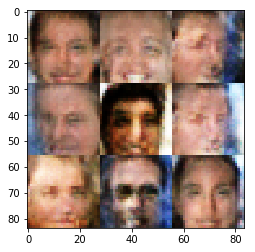

Epoch: 1 / 1 ; Disc Loss: 0.220899 ; Gen Loss: 2.73846
Epoch: 1 / 1 ; Disc Loss: 0.295077 ; Gen Loss: 2.89385
Epoch: 1 / 1 ; Disc Loss: 0.703721 ; Gen Loss: 3.81581
Epoch: 1 / 1 ; Disc Loss: 1.05597 ; Gen Loss: 0.573391


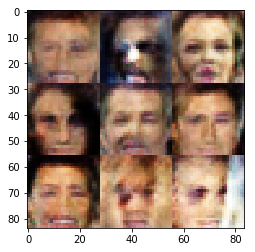

Epoch: 1 / 1 ; Disc Loss: 0.817375 ; Gen Loss: 0.762156
Epoch: 1 / 1 ; Disc Loss: 0.40632 ; Gen Loss: 1.79367
Epoch: 1 / 1 ; Disc Loss: 0.33245 ; Gen Loss: 1.8089
Epoch: 1 / 1 ; Disc Loss: 0.965713 ; Gen Loss: 0.712903


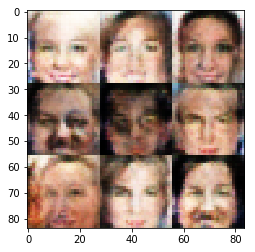

Epoch: 1 / 1 ; Disc Loss: 1.55199 ; Gen Loss: 0.462596
Epoch: 1 / 1 ; Disc Loss: 0.355644 ; Gen Loss: 2.40919
Epoch: 1 / 1 ; Disc Loss: 1.89155 ; Gen Loss: 0.23491
Epoch: 1 / 1 ; Disc Loss: 2.32989 ; Gen Loss: 0.122305


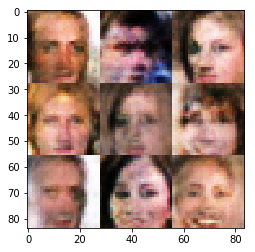

Epoch: 1 / 1 ; Disc Loss: 1.26589 ; Gen Loss: 0.379574
Epoch: 1 / 1 ; Disc Loss: 1.07374 ; Gen Loss: 0.545569
Epoch: 1 / 1 ; Disc Loss: 1.66932 ; Gen Loss: 0.447304
Epoch: 1 / 1 ; Disc Loss: 0.616637 ; Gen Loss: 0.920464


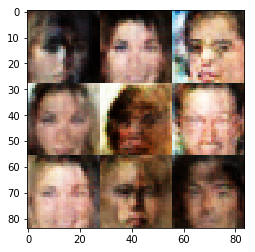

Epoch: 1 / 1 ; Disc Loss: 0.740944 ; Gen Loss: 1.17954
Epoch: 1 / 1 ; Disc Loss: 0.658348 ; Gen Loss: 1.01146
Epoch: 1 / 1 ; Disc Loss: 1.16854 ; Gen Loss: 0.442913
Epoch: 1 / 1 ; Disc Loss: 1.16283 ; Gen Loss: 0.743883


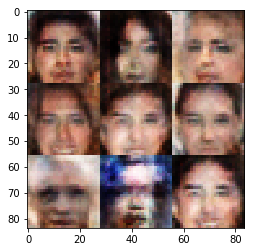

Epoch: 1 / 1 ; Disc Loss: 0.395123 ; Gen Loss: 1.70966
Epoch: 1 / 1 ; Disc Loss: 1.13899 ; Gen Loss: 5.13117
Epoch: 1 / 1 ; Disc Loss: 0.420393 ; Gen Loss: 1.29713
Epoch: 1 / 1 ; Disc Loss: 0.387936 ; Gen Loss: 4.54829


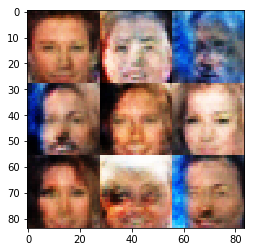

Epoch: 1 / 1 ; Disc Loss: 0.776207 ; Gen Loss: 0.838634
Epoch: 1 / 1 ; Disc Loss: 1.93885 ; Gen Loss: 5.21038
Epoch: 1 / 1 ; Disc Loss: 0.561647 ; Gen Loss: 2.39905
Epoch: 1 / 1 ; Disc Loss: 0.959937 ; Gen Loss: 0.583005


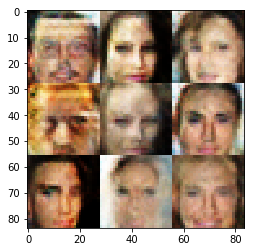

Epoch: 1 / 1 ; Disc Loss: 1.04278 ; Gen Loss: 5.93898
Epoch: 1 / 1 ; Disc Loss: 0.47107 ; Gen Loss: 1.30808
Epoch: 1 / 1 ; Disc Loss: 0.993152 ; Gen Loss: 0.660025
Epoch: 1 / 1 ; Disc Loss: 0.468644 ; Gen Loss: 1.30119


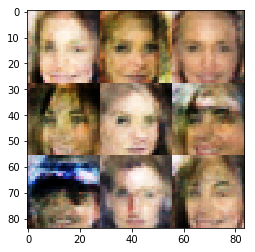

Epoch: 1 / 1 ; Disc Loss: 0.751473 ; Gen Loss: 0.777515
Epoch: 1 / 1 ; Disc Loss: 1.3668 ; Gen Loss: 0.405526
Epoch: 1 / 1 ; Disc Loss: 0.264152 ; Gen Loss: 2.08286
Epoch: 1 / 1 ; Disc Loss: 1.09007 ; Gen Loss: 0.542344


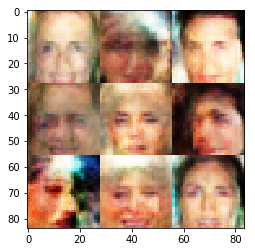

Epoch: 1 / 1 ; Disc Loss: 1.18369 ; Gen Loss: 0.438707
Epoch: 1 / 1 ; Disc Loss: 0.879277 ; Gen Loss: 0.796812
Epoch: 1 / 1 ; Disc Loss: 0.676665 ; Gen Loss: 0.942668
Epoch: 1 / 1 ; Disc Loss: 0.784059 ; Gen Loss: 2.48364


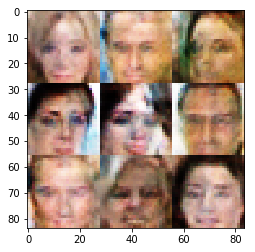

Epoch: 1 / 1 ; Disc Loss: 0.452851 ; Gen Loss: 2.69932
Epoch: 1 / 1 ; Disc Loss: 1.08309 ; Gen Loss: 0.465575
Epoch: 1 / 1 ; Disc Loss: 1.53489 ; Gen Loss: 0.3435
Epoch: 1 / 1 ; Disc Loss: 0.405432 ; Gen Loss: 1.52183


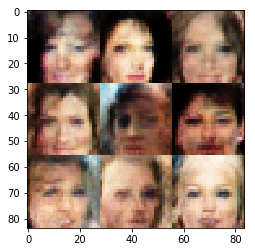

Epoch: 1 / 1 ; Disc Loss: 0.96139 ; Gen Loss: 0.569899
Epoch: 1 / 1 ; Disc Loss: 0.876167 ; Gen Loss: 4.35035
Epoch: 1 / 1 ; Disc Loss: 0.733007 ; Gen Loss: 0.841589
Epoch: 1 / 1 ; Disc Loss: 0.461464 ; Gen Loss: 1.53238


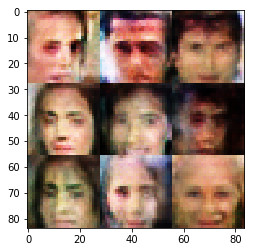

Epoch: 1 / 1 ; Disc Loss: 1.83234 ; Gen Loss: 0.213712
Epoch: 1 / 1 ; Disc Loss: 0.752696 ; Gen Loss: 0.978327
Epoch: 1 / 1 ; Disc Loss: 0.785649 ; Gen Loss: 0.696927
Epoch: 1 / 1 ; Disc Loss: 0.426101 ; Gen Loss: 2.70373


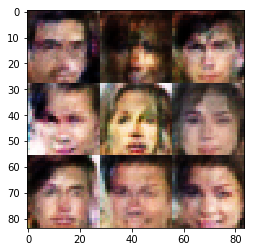

Epoch: 1 / 1 ; Disc Loss: 1.343 ; Gen Loss: 0.329332
Epoch: 1 / 1 ; Disc Loss: 0.813216 ; Gen Loss: 4.60599
Epoch: 1 / 1 ; Disc Loss: 0.636834 ; Gen Loss: 0.925056
Epoch: 1 / 1 ; Disc Loss: 0.460252 ; Gen Loss: 1.60224


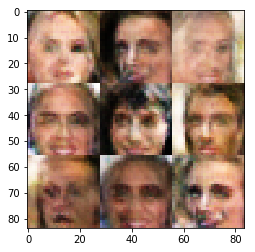

Epoch: 1 / 1 ; Disc Loss: 0.319136 ; Gen Loss: 1.67236
Epoch: 1 / 1 ; Disc Loss: 1.45061 ; Gen Loss: 0.436577
Epoch: 1 / 1 ; Disc Loss: 1.10087 ; Gen Loss: 0.457051
Epoch: 1 / 1 ; Disc Loss: 1.73444 ; Gen Loss: 0.303577


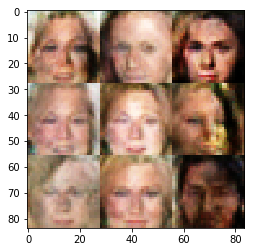

Epoch: 1 / 1 ; Disc Loss: 0.38504 ; Gen Loss: 2.95522
Epoch: 1 / 1 ; Disc Loss: 0.437523 ; Gen Loss: 2.02136
Epoch: 1 / 1 ; Disc Loss: 0.794908 ; Gen Loss: 0.665287
Epoch: 1 / 1 ; Disc Loss: 1.08338 ; Gen Loss: 0.551779


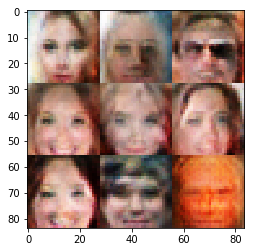

Epoch: 1 / 1 ; Disc Loss: 0.774979 ; Gen Loss: 0.875207
Epoch: 1 / 1 ; Disc Loss: 0.586884 ; Gen Loss: 3.26449
Epoch: 1 / 1 ; Disc Loss: 1.11023 ; Gen Loss: 0.706024
Epoch: 1 / 1 ; Disc Loss: 1.17343 ; Gen Loss: 0.421277


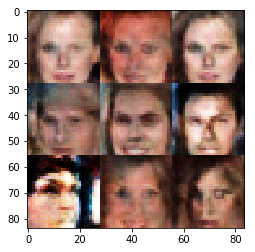

Epoch: 1 / 1 ; Disc Loss: 0.438145 ; Gen Loss: 2.05712
Epoch: 1 / 1 ; Disc Loss: 0.545041 ; Gen Loss: 3.82801
Epoch: 1 / 1 ; Disc Loss: 0.800148 ; Gen Loss: 0.779685
Epoch: 1 / 1 ; Disc Loss: 1.48796 ; Gen Loss: 0.393181


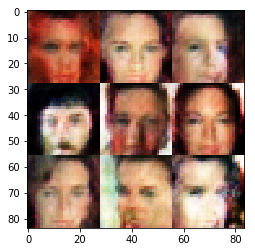

Epoch: 1 / 1 ; Disc Loss: 0.481004 ; Gen Loss: 1.50656
Epoch: 1 / 1 ; Disc Loss: 1.29197 ; Gen Loss: 4.9894
Epoch: 1 / 1 ; Disc Loss: 0.839965 ; Gen Loss: 0.761857


KeyboardInterrupt: 

In [112]:
batch_size = 32
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.